# Bioimage Model Zoo and BioImageArchive integration example notebook

This notebook shows how to benchmark models from the [BioImage Model Zoo](https://bioimage.io) using reference datasets from the [BioImage Archive](https://www.ebi.ac.uk/bioimage-archive/)

### 1. Import necessary dependencies

In [1]:
from bia_bmz_integration import bulk_process

2024-10-21 07:48:30.469714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Input BMZ models to benchmark

Let's look at the performance of [loyal squid](https://bioimage.io/#/?tags=loyal-squid&id=10.5281%2Fzenodo.6383429) and [noisy fish](https://bioimage.io/#/?id=10.5281%2Fzenodo.7772662&type=model&tags=noisy-fish) to segment cell nuclei in 3D.

In [2]:
models = [
    "loyal-squid",
    "noisy-fish",
]

### 3. Input reference image and annotation from the BIA

We will test their performance on [S-BIAD1026](https://www.ebi.ac.uk/biostudies/bioimages/studies/S-BIAD1026). A dataset that contains annotated 3D images of Arabidopsis Ovules. 

In [3]:
datasets = {
    "BIAD1026": (
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_H2BtdTomato.ome.zarr/0",
        "https://uk1s3.embassy.ebi.ac.uk/bia-zarr-test/1135_n_stain_StarDist_goldGT_180_rotation.ome.zarr/0",
    )
}

### 4. Run benchmarking

We are going to run the models only on a few z planes to speed things up. 

2024-10-21 07:48:36.365 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading loyal-squid from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/loyal-squid/1/files/rdf.yaml
computing SHA256 of dda95f7f60c6068d78ba361cb7f3bb4a-unet-bce-dice-ab-nuclei-boundary-090121.pytorch (result: c7c73485fd17273f8018e7e8ba76c030d7b0c8553a242ac1303b23904f6303ef): 100%|██████████| 32/32 [00:00<00:00, 4588.48it/s]
computing SHA256 of 33f352b4c9795752f4fb121864142882-torchscript_tracing.pt (result: 01b197c06500ab96d5ef051901fcd07add7f5b96ef3bbac9473f34be9c4d7ba0): 100%|██████████| 33/33 [00:00<00:00, 5020.57it/s]


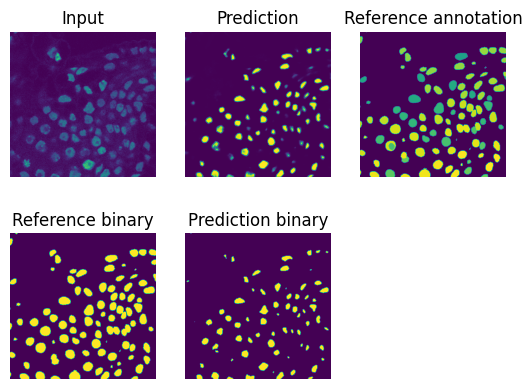

2024-10-21 07:48:41.040 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:112 - loading noisy-fish from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/noisy-fish/1/files/rdf.yaml
computing SHA256 of bb65d9efd934981f2278f9240b79217e-confocal_3D_unet_ovules_nuclei_ds1x.pytorch (result: a02824ac1a3ac43122ba6345804664be7d70124ac23b07cd1c488818b61895ef): 100%|██████████| 125/125 [00:00<00:00, 6513.22it/s]
computing SHA256 of 9305d677cac6c31f76135bad97cb47bd-torchscript_tracing.pt (result: b3f6e6597ddf5d937f054020e596184612314b2b17a75eff7ffe942cf652c3e5): 100%|██████████| 126/126 [00:00<00:00, 6071.93it/s]


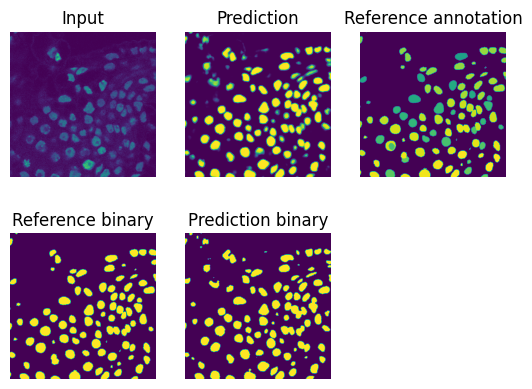

In [4]:
scores = bulk_process(models, datasets, z_planes=[170, 178], crop_image = [512, 512])

### 5. Display benchmarking metrics

Here we can have a look at the benchmarking scores. The relevant metrics for segmentation are: precision, recall, IoU and Dice. The scores vary from 0 to 1, with 1 denoting the most similarity between the model's prediction and the reference annotation.

In [5]:
display(scores)

Dataset BIAD1026
Model              Score                      
Model: loyal-squid Precision          0.997000
                   Recall             0.391000
                   IoU                0.390359
                   Dice               0.561523
                   PSNR               8.433193
                   RMSE             426.460358
                   SSIM               0.676011
Model: noisy-fish  Precision          0.803000
                   Recall             0.868000
                   IoU                0.715761
                   Dice               0.834336
                   PSNR               8.437115
                   RMSE             426.268066
                   SSIM               0.676075